# 1. Importing Data and Libraries

In [1]:
# import data and libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Define path

path = r'/Users/Chloe/Documents/2. CareerFoundry/2. Data Immersion pt 1/Achievement 6/Final Data Project/02 Data/Prepared Data'

In [4]:
path

'/Users/Chloe/Documents/2. CareerFoundry/2. Data Immersion pt 1/Achievement 6/Final Data Project/02 Data/Prepared Data'

In [5]:
# Import most updated data

df = pd.read_csv(os.path.join(path, 'AB_US_2020_clean.csv'))

/var/folders/z2/5vq5z7g94w536gb5fb2v7sv40000gn/T/ipykernel_38301/2740001317.py:3: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(path, 'AB_US_2020_clean.csv'))


# 2. Data Cleaning

In [6]:
df.columns

Index(['Unnamed: 0', 'id', 'name', 'host_id', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'city'],
      dtype='object')

In [7]:
df.head()

,Unnamed: 0,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,city
0,0,38585,Charming Victorian home - twin beds + breakfast,165529,NaN,28804,35.65146,-82.62792,Private room,60,1,138,16/02/20,1.14,1,0,Asheville
1,1,80905,French Chic Loft,427027,NaN,28801,35.59779,-82.55540,Entire home/apt,470,1,114,07/09/20,1.03,11,288,Asheville
2,2,108061,Walk to stores/parks/downtown. Fenced yard/Pet...,320564,NaN,28801,35.60670,-82.55563,Entire home/apt,75,30,89,30/11/19,0.81,2,298,Asheville
3,3,155305,Cottage! BonPaul + Sharky's Hostel,746673,NaN,28806,35.57864,-82.59578,Entire home/apt,90,1,267,22/09/20,2.39,5,0,Asheville
4,4,160594,Historic Grove Park,769252,NaN,28801,35.61442,-82.54127,Private room,125,30,58,19/10/15,0.52,1,0,Asheville


In [8]:
#check for mix type values
for col in df.columns.tolist():
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df[weird]) > 0:
    print (col)

name
neighbourhood_group
last_review


In [9]:
# fix mix type value columns

df['name'] = df['name'].astype('str')
df['neighbourhood_group'] = df['neighbourhood_group'].astype('str')
df['last_review'] = df['last_review'].astype('str')

In [11]:
#check for mix type values
for col in df.columns.tolist():
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df[weird]) > 0:
    print (col)
#no more mix type values

In [12]:
# drop Unnamed column

df = df.drop(columns = ['Unnamed: 0'])

Check for duplicates

In [14]:
dups = df.duplicated()

In [15]:
dups.shape

(226030,)

In [16]:
# no duplicate values

Extreme values check

/Users/Chloe/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

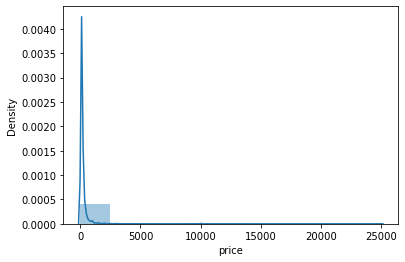

In [19]:
sns.distplot(df['price'], bins=10) # Shows extreme values

In [20]:
df['price'].mean() # Check the mean

219.71652877936558

In [21]:
df['price'].median() # Check the median

121.0

In [22]:
df['price'].max() # Check the max

24999

# 3. Data prep for regression analysis

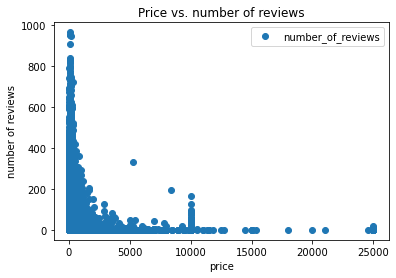

In [25]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'price', y='number_of_reviews',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Price vs. number of reviews')  
plt.xlabel('price')  
plt.ylabel('number of reviews')  
plt.show()

Based on the scatter plot above, we can see that there seems to be a moderately negative correlation between price and number of reviews (as price goes up, the number of reviews goes down)

In [26]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['price'].values.reshape(-1,1)
y = df['number_of_reviews'].values.reshape(-1,1)

In [27]:
X

array([[ 60],
       [470],
       [ 75],
       ...,
       [240],
       [ 60],
       [ 79]])

In [28]:
y

array([[138],
       [114],
       [ 89],
       ...,
       [  0],
       [  0],
       [  0]])

In [29]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 4. Regression analysis

In [30]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [31]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [32]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

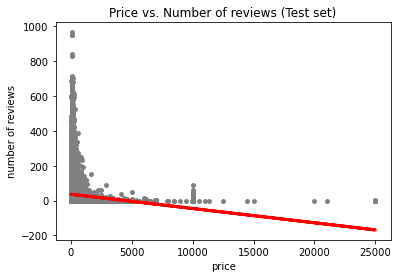

In [33]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Price vs. Number of reviews (Test set)')
plot_test.xlabel('price')
plot_test.ylabel('number of reviews')
plot_test.show()

As expected based on the scatter plot, the regression line on the test set is showing a moderately negative correlation between price and number of reviews

In [34]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [35]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.00819329]]
Mean squared error:  4085.832999877069
R2 score:  0.005177916358700019


In [36]:
y_predicted

array([[34.14606261],
       [31.03261355],
       [23.85529412],
       ...,
       [28.61559388],
       [34.14606261],
       [32.4500522 ]])

In [37]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,0,34.146063
1,3,31.032614
2,0,23.855294
3,0,32.392699
4,68,34.932618
5,14,34.842492
6,10,35.383249
7,2,34.146063
8,40,34.350895
9,0,35.514342


Compare how the regression fits the training set

In [38]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [39]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [40]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.00819329]]
Mean squared error:  3997.5759357890365
R2 score:  0.005279025243235758


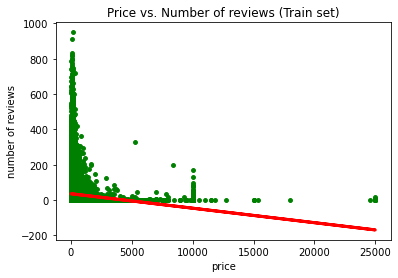

In [41]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Price vs. Number of reviews (Train set)')
plot_test.xlabel('price')
plot_test.ylabel('number of reviews')
plot_test.show()

In the training set visualization above, we can see that the prediction model did a great job of guessing the Y values and also shows the moderate negative correlation